In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/SKT/Desktop/SQL RIHAN/Customer-Churn-analysis-main/Customer-Churn-analysis-main/Customer Churn.csv")
df.head(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#repalcing with 0 as tenurw is 0 and no total charge are recorded

In [7]:
df['TotalCharges']=df['TotalCharges'].replace(" ", "0")
df['TotalCharges']=df['TotalCharges'].astype("float")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


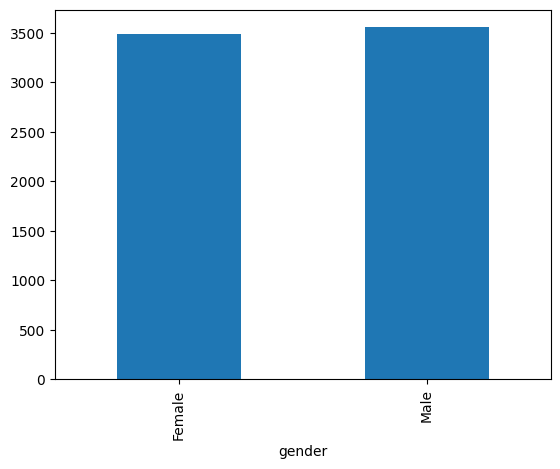

<Figure size 300x500 with 0 Axes>

In [10]:
df.groupby('gender').size().plot(kind='bar')
plt.figure(figsize=(3,5))
plt.show()


<Figure size 400x500 with 0 Axes>

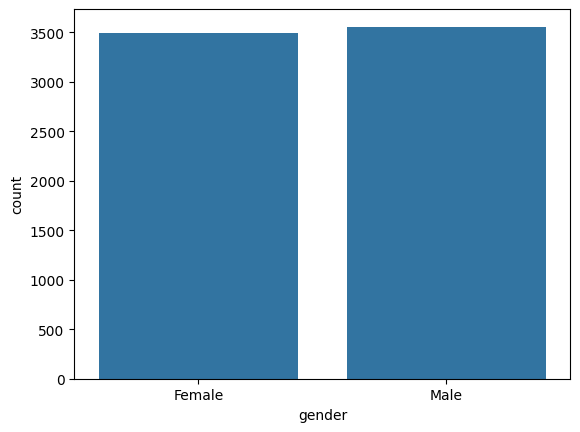

<Figure size 400x500 with 0 Axes>

In [11]:
sns.countplot(x='gender', data=df)
plt.figure(figsize=(4,5))

In [12]:
def canv(value):
    if value==1:
          return "yes"
    else:
        return "no";


df['SeniorCitizen']=df['SeniorCitizen'].apply(canv)


#converted 0 and 1 vlaues of senior citizen to yes/no to make it easier to understend

<Figure size 400x500 with 0 Axes>

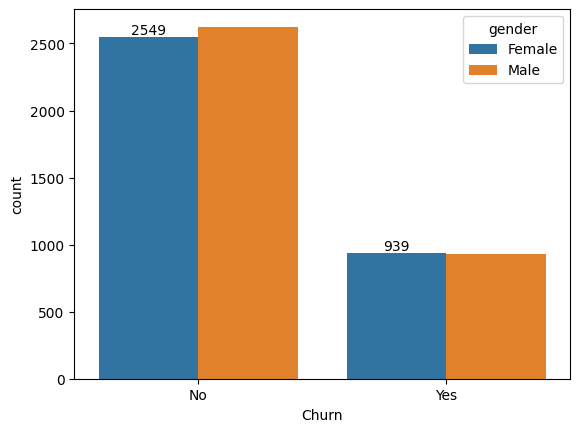

<Figure size 400x500 with 0 Axes>

In [13]:
ax=sns.countplot(x='Churn', data=df, hue='gender')
ax.bar_label(ax.containers[0])
plt.figure(figsize=(4,5))

In [14]:
has=df.groupby('Churn').agg({'Churn':"count"})
has

,Churn
Churn,
No,5174
Yes,1869


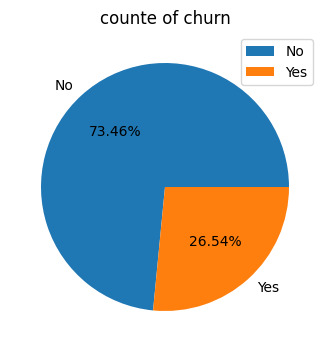

In [15]:
plt.figure(figsize=(4,5))
plt.pie(has['Churn'], labels=has.index, autopct="%0.2f%%")
plt.legend()
plt.title("counte of churn")


plt.show()

In [16]:
has

,Churn
Churn,
No,5174
Yes,1869


#from the given pie chart we can conclude that 26.54% of our customer have churned out 
#not lets explore the reason behind it

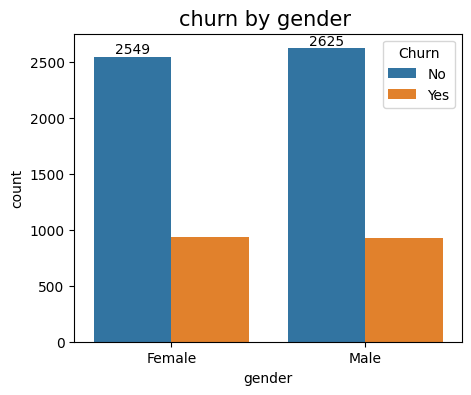

In [17]:
plt.figure(figsize=(5,4))
fg=sns.countplot(x='gender', hue='Churn', data=df)
fg.bar_label(fg.containers[0])
plt.title("churn by gender ", fontsize=15)

plt.show()

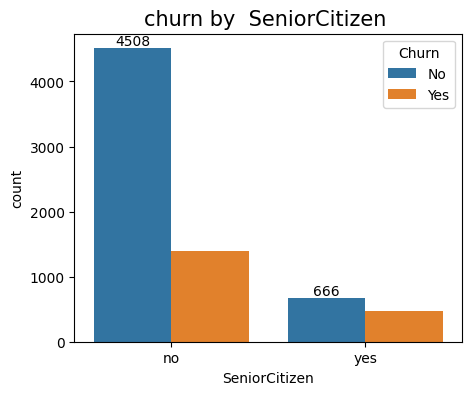

In [18]:
plt.figure(figsize=(5,4))
fg=sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
fg.bar_label(fg.containers[0])
plt.title("churn by  SeniorCitizen ", fontsize=15)

plt.show()

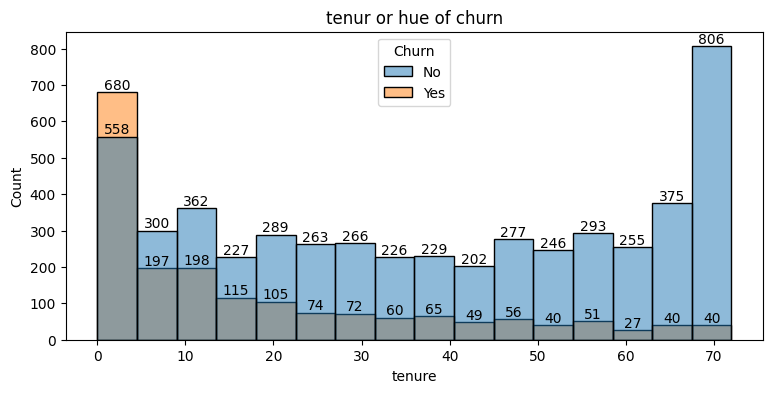

In [25]:
plt.figure(figsize=(9,4))
ax=sns.histplot(x='tenure',data=df, hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("tenur or hue of churn")
plt.show()

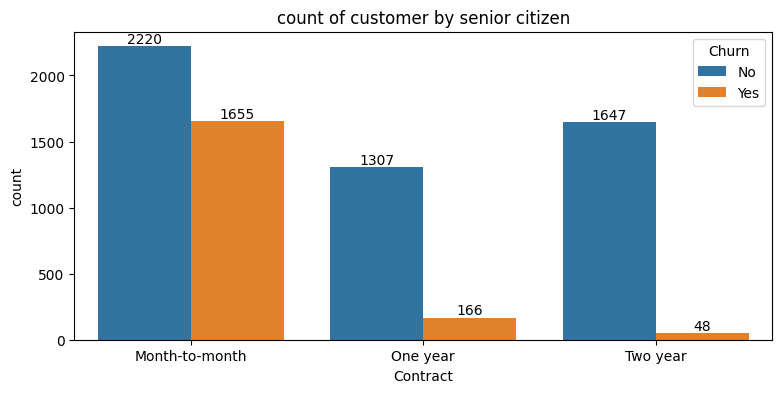

In [32]:
plt.figure(figsize=(9,4))
ax=sns.countplot(x="Contract",data=df, hue ='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("count of customer by senior citizen")
plt.show()

#people who have month to month contract are likly to churn then from those who have 1 or 2 year or contrect
-

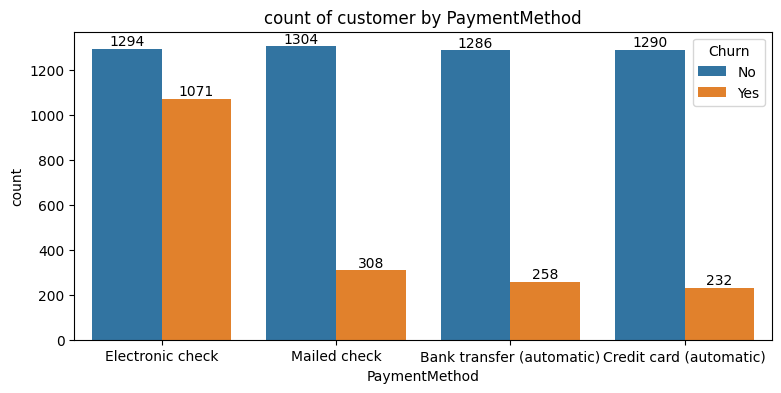

In [33]:
plt.figure(figsize=(9,4))
ax=sns.countplot(x="PaymentMethod",data=df, hue ='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("count of customer by PaymentMethod")
plt.show()